In [ ]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.fftpack import fft

file_path = '/content/drive/MyDrive/DSP/dsp-dos-four-dos-Sheet1.csv'
data = pd.read_csv(file_path)

data.head() # Displaying few rows from the dataset


Mounted at /content/drive


,date,humi,temp
0,10/20/2023_12:33:37,75.9,29.2
1,10/20/2023_12:48:43,75.9,29.2
2,10/20/2023_13:03:48,75.5,30.1
3,10/20/2023_13:18:58,84.8,30.6
4,10/20/2023_13:34:09,88.2,30.9


A. Periodic Signal for Temperature

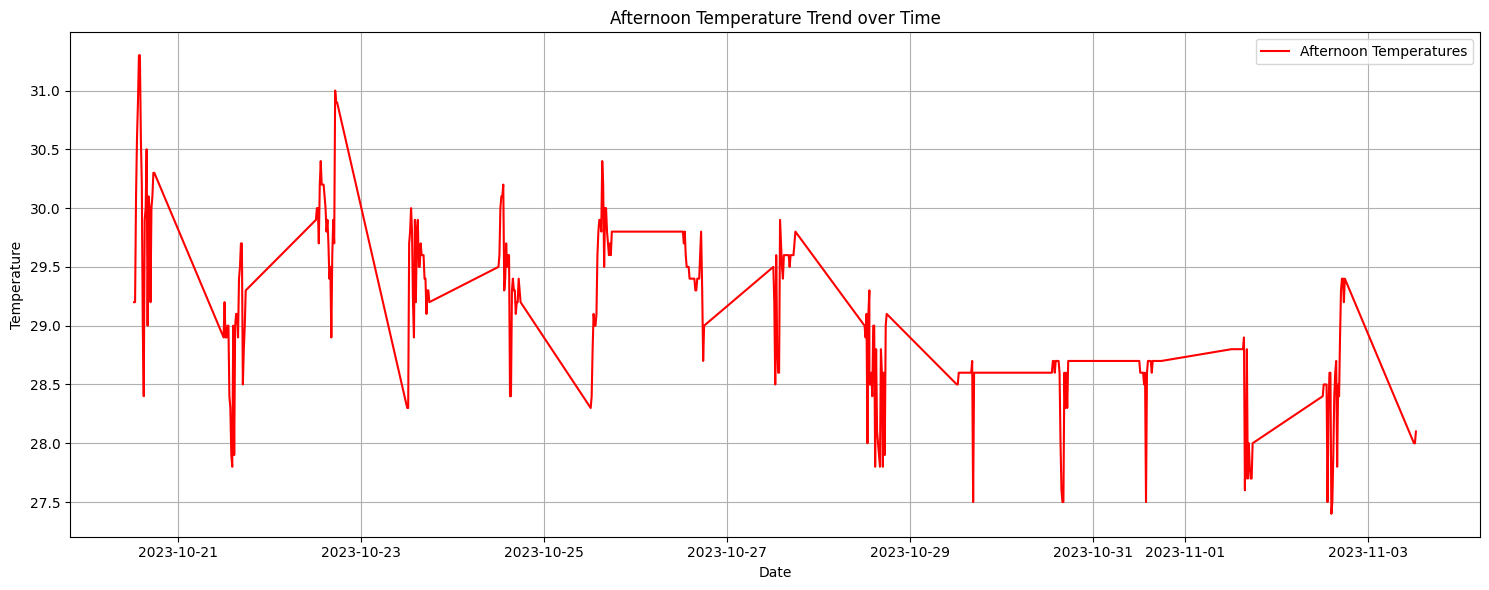

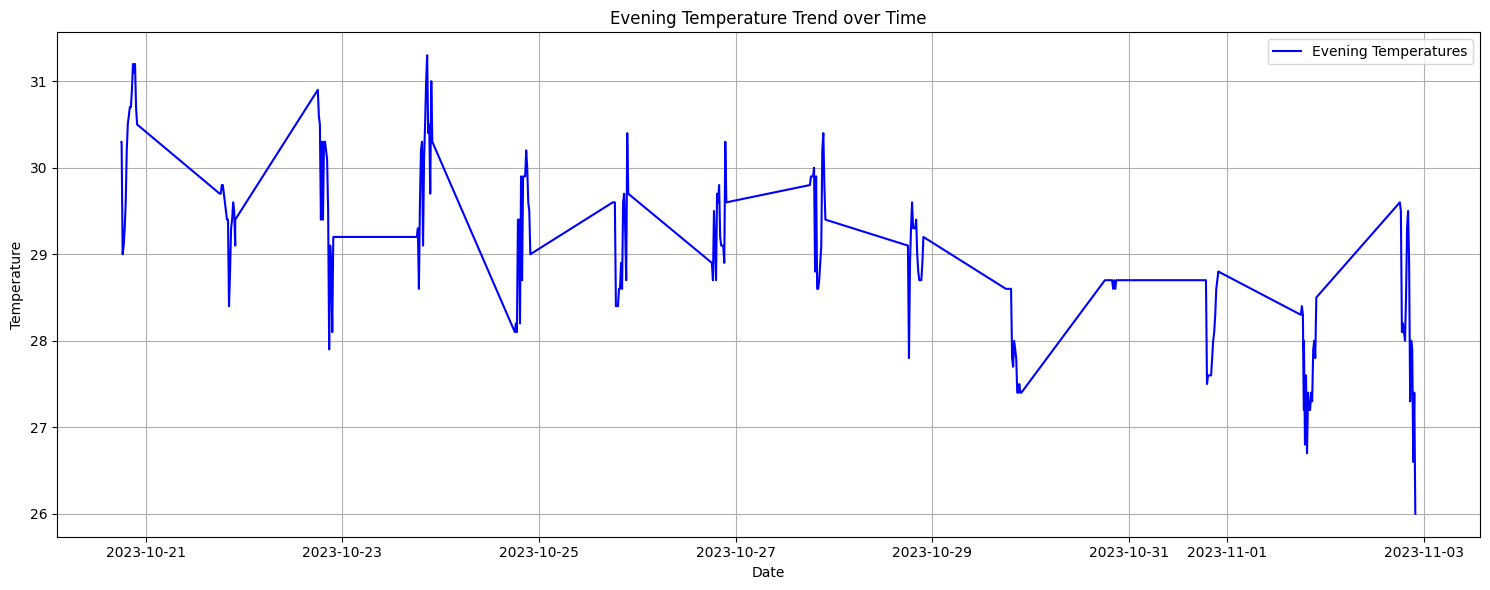

Average Afternoon Temperature: 29.07
Average Evening Temperature: 29.03


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y_%H:%M:%S') #Converting the date colum to datetime format

data['hour'] = data['date'].dt.hour #Extracting the hour for each entry in the dataset

#Afternoon Data: 12 PM to 5 PM
#Evening Data: 5 PM to 9 PM
#Extracting afternoon and evening data for analysis
afternoon_data = data[(data['hour'] >= 12) & (data['hour'] <= 17)]
evening_data = data[(data['hour'] > 17) & (data['hour'] <= 21)]

#Plotting afternoon temperature data
plt.figure(figsize=(15, 6))
plt.plot(afternoon_data['date'], afternoon_data['temp'], color='red', label='Afternoon Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Afternoon Temperature Trend over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/DSP/afternoon_temperature_plot.png')
plt.show()

#Plotting evening temperature data
plt.figure(figsize=(15, 6))
plt.plot(evening_data['date'], evening_data['temp'], color='blue', label='Evening Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Evening Temperature Trend over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/DSP/evening_temperature_plot.png')
plt.show()

print(f"Average Afternoon Temperature: {afternoon_data['temp'].mean():.2f}")
print(f"Average Evening Temperature: {evening_data['temp'].mean():.2f}")


B. Periodic Signal of Humidity

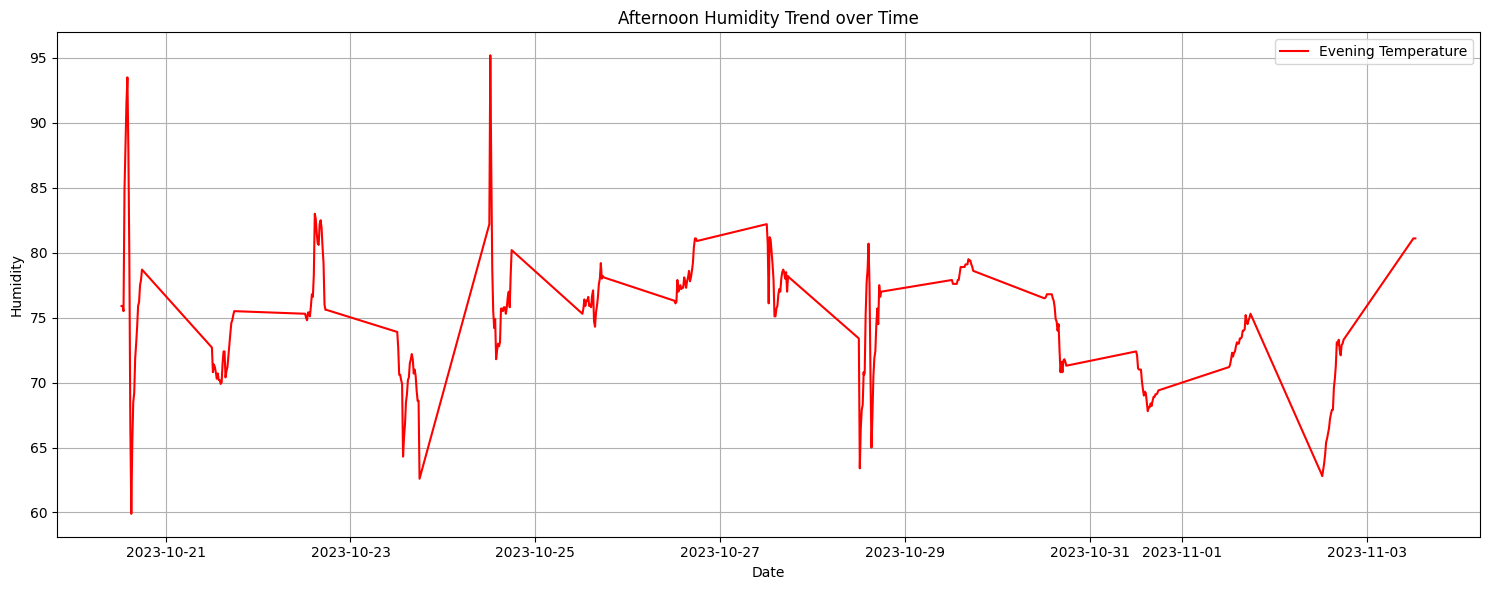

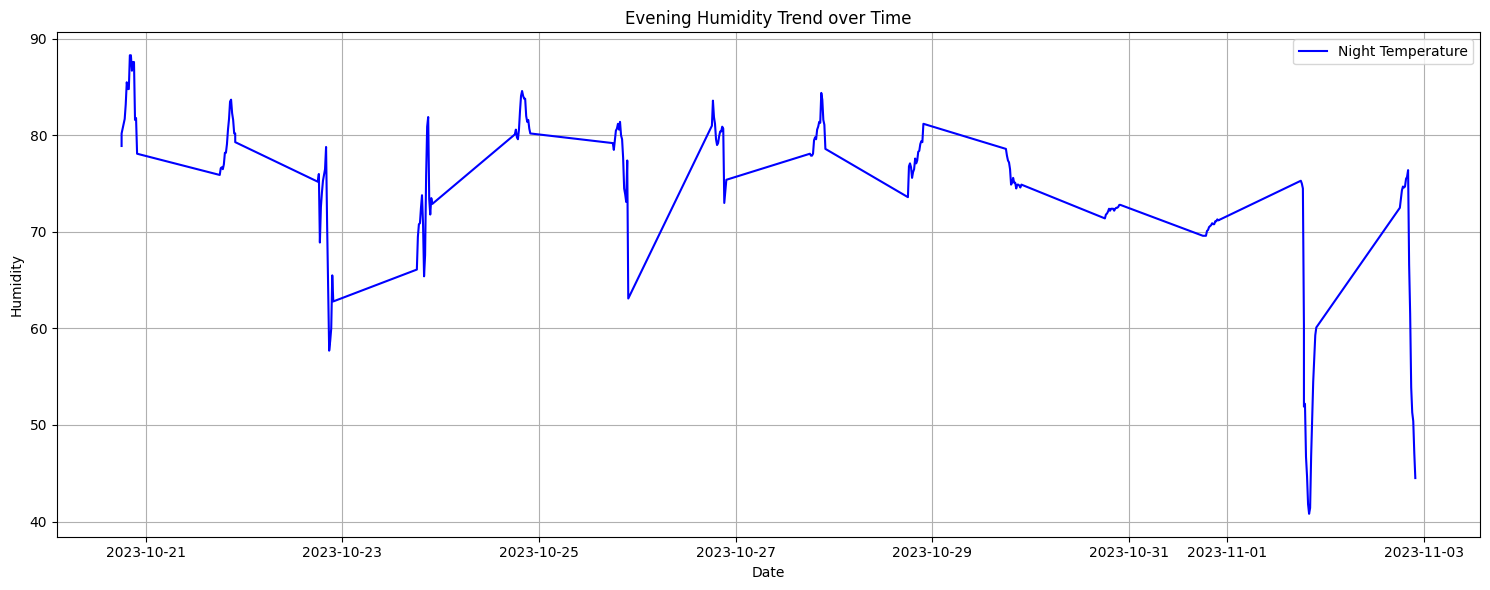

Average Afternoon Humidity: 74.55
Average Evening Humidity: 74.26


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y_%H:%M:%S')

# Extract hour from datetime to identify parts of the day
data['hour'] = data['date'].dt.hour

#Afternoon Data: 12 PM to 5 PM
#Evening Data: 5 PM to 9 PM
#Extracting afternoon and evening data for analysis
afternoon_data = data[(data['hour'] >= 12) & (data['hour'] <= 17)]
evening_data = data[(data['hour'] > 17) & (data['hour'] <= 21)]

# Plotting data for afternoon
plt.figure(figsize=(15, 6))
plt.plot(afternoon_data['date'], afternoon_data['humi'], color='red', label='Evening Temperature')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Afternoon Humidity Trend over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/DSP/afternoon_humidity_plot.png')
plt.show()

# Plotting data for evening
plt.figure(figsize=(15, 6))
plt.plot(evening_data['date'], evening_data['humi'], color='blue', label='Night Temperature')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Evening Humidity Trend over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/DSP/evening_humidity_plot.png')
plt.show()

print(f"Average Afternoon Humidity: {afternoon_data['humi'].mean():.2f}")
print(f"Average Evening Humidity: {evening_data['humi'].mean():.2f}")


C. Daily Temperature Trends from October 20 to November 3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


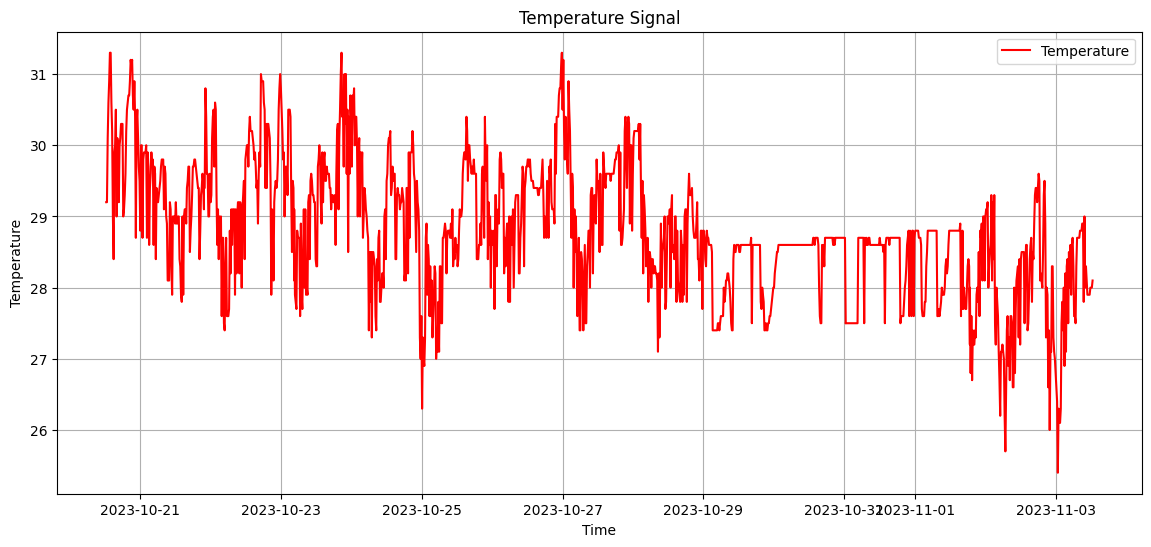

In [20]:
plt.figure(figsize=(14, 6))
plt.plot(data['date'], data['temp'], label="Temperature", color='red')
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Temperature Signal")
plt.legend()
plt.grid(True)
plt.savefig('/content/drive/MyDrive/DSP/temperature_signal_plot.png')
plt.show()


D. Daily Humidity Trends from October 20 to November 3

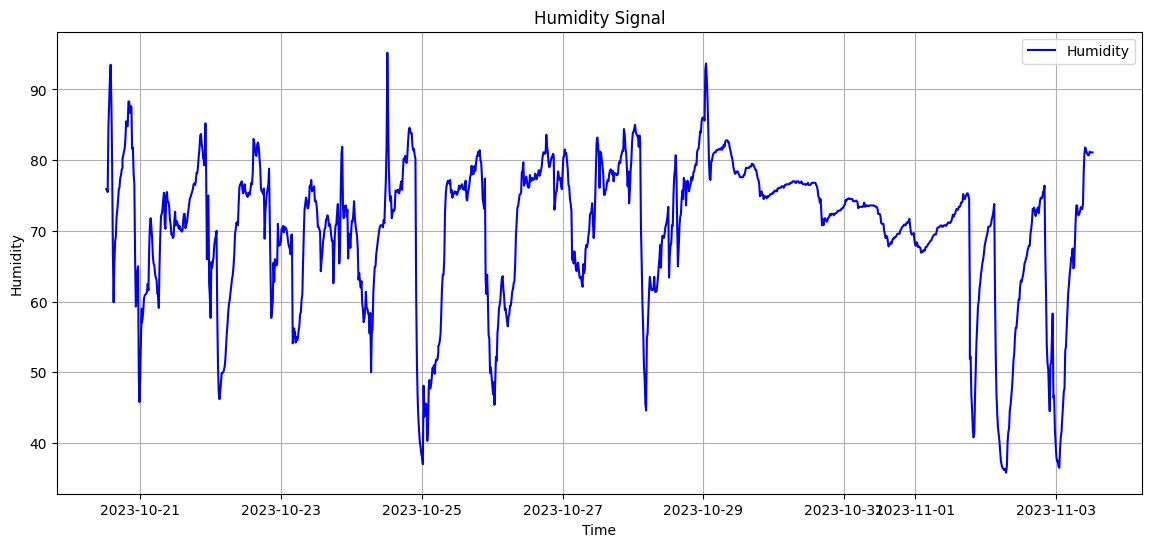

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(data['date'], data['humi'], label="Humidity", color='blue') #Retrieves the humidity data
plt.xlabel("Time")
plt.ylabel("Humidity")
plt.title("Humidity Signal")
plt.legend()
plt.grid(True)
plt.savefig('/content/drive/MyDrive/DSP/humidity_signal_plot.png')
plt.show()


E. Amplitude & Phase of Temperature

                 date  humi  temp  hour
0 2023-10-20 12:33:37  75.9  29.2    12
1 2023-10-20 12:48:43  75.9  29.2    12
2 2023-10-20 13:03:48  75.5  30.1    13
3 2023-10-20 13:18:58  84.8  30.6    13
4 2023-10-20 13:34:09  88.2  30.9    13


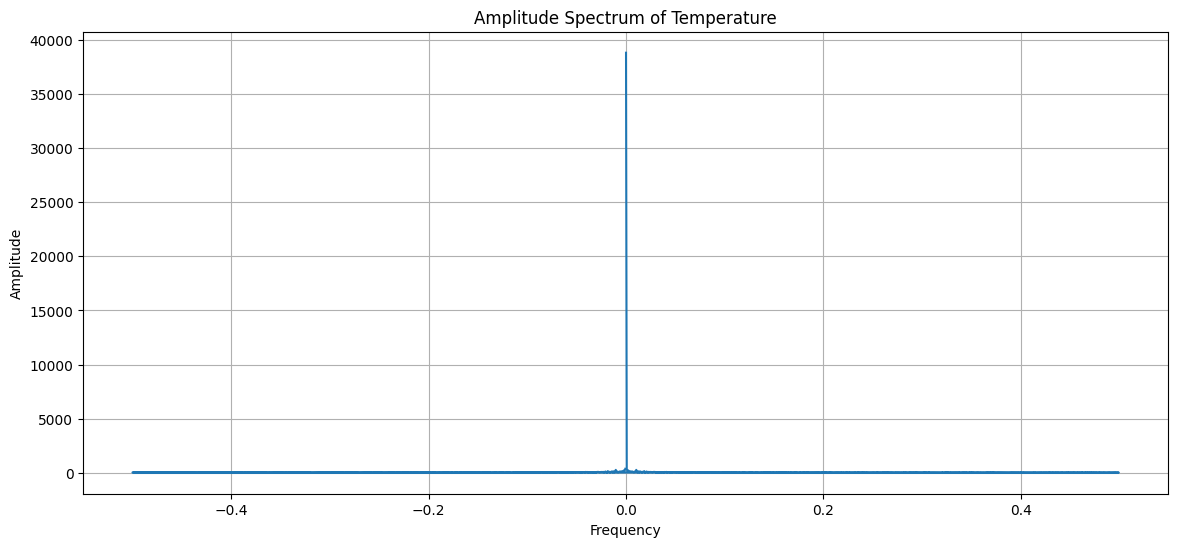

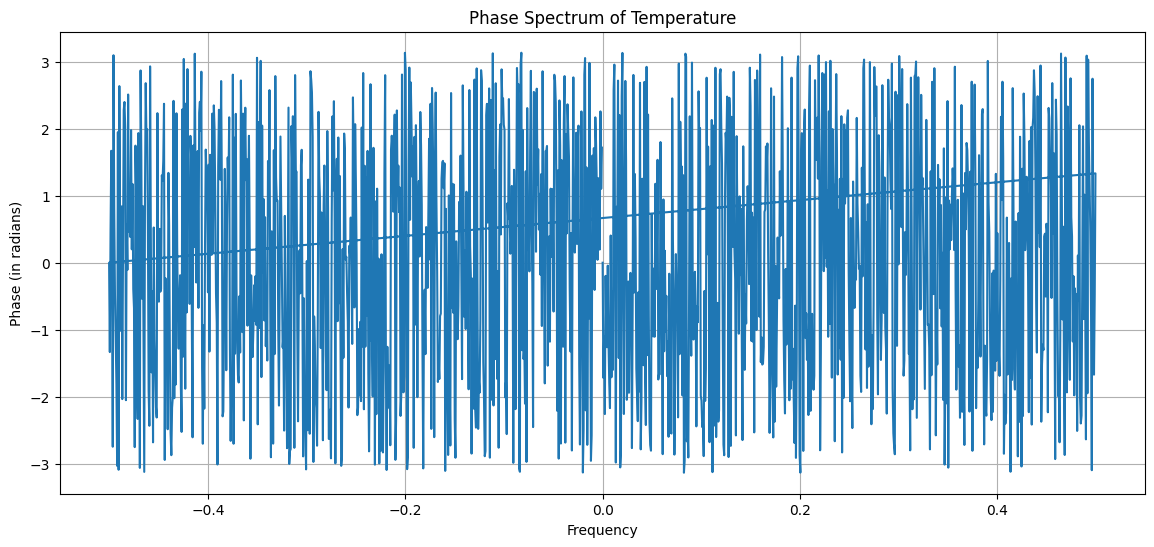

In [ ]:
#Numpy's Fast Fourier Transform function
temp_fft = np.fft.fft(data['temp']) #Computing the FFT of the temperature data
frequencies = np.fft.fftfreq(len(temp_fft)) #Computes frequencies corresponding to FFT components

plt.figure(figsize=(14, 6))
plt.plot(frequencies, np.abs(temp_fft))
plt.title('Amplitude Spectrum of Temperature')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.savefig('/content/drive/MyDrive/DSP/temperature_amplitude_spectrum_plot.png')
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(frequencies, np.angle(temp_fft))
plt.title('Phase Spectrum of Temperature')
plt.xlabel('Frequency')
plt.ylabel('Phase (in radians)')
plt.grid(True)
plt.savefig('/content/drive/MyDrive/DSP/temperature_phase_spectrum_plot.png')
plt.show()


F. Amplitude & Spectrum of Humidity

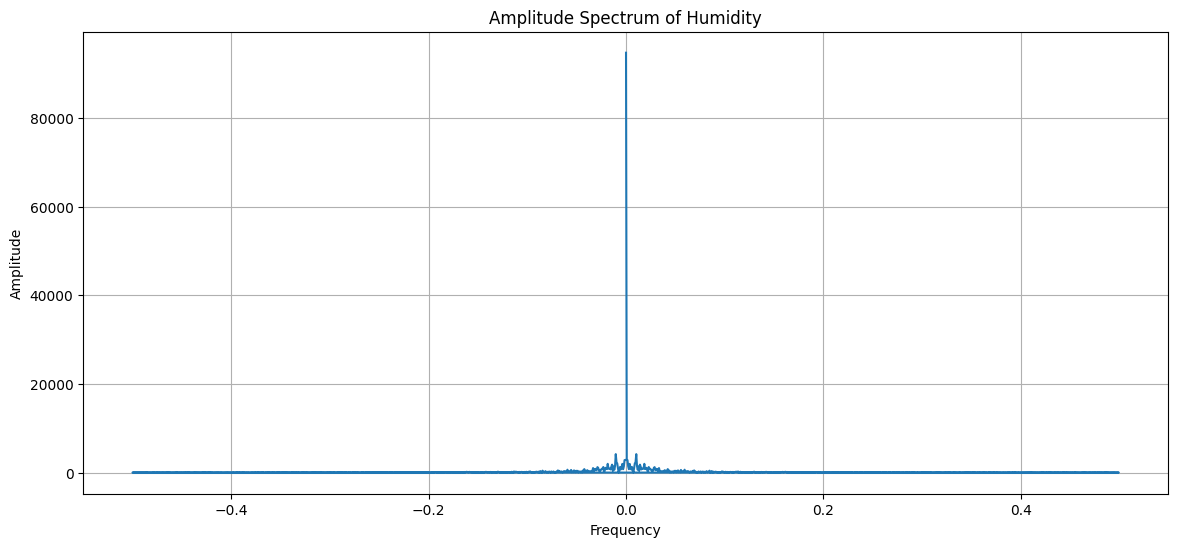

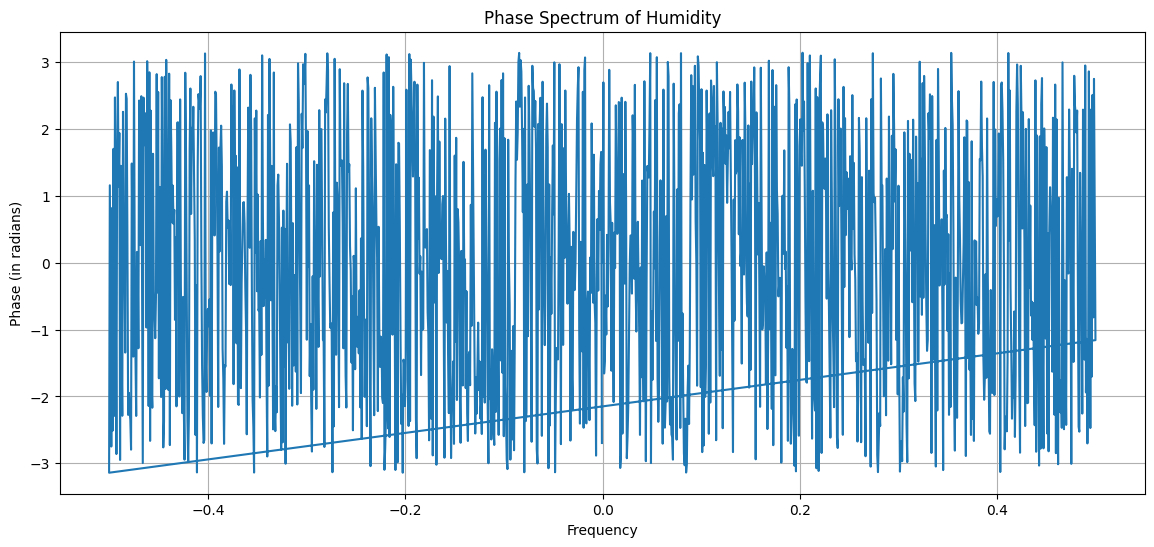

In [ ]:
#Numpy's Fast Fourier Transform function
humi_fft = np.fft.fft(data['humi']) #Computing the FFT of the temperature data
humi_frequencies = np.fft.fftfreq(len(humi_fft)) #Computes frequencies corresponding to FFT components

plt.figure(figsize=(14, 6))
plt.plot(humi_frequencies, np.abs(humi_fft))
plt.title('Amplitude Spectrum of Humidity')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.savefig('/content/drive/MyDrive/DSP/humidity_amplitude_spectrum_plot.png')
plt.show()

# Plotting Phase Spectrum for humidity
plt.figure(figsize=(14, 6))
plt.plot(humi_frequencies, np.angle(humi_fft))
plt.title('Phase Spectrum of Humidity')
plt.xlabel('Frequency')
plt.ylabel('Phase (in radians)')
plt.grid(True)
plt.savefig('/content/drive/MyDrive/DSP/humidity_phase_spectrum_plot.png')
plt.show()


Mean Median Mode

In [ ]:
mean_humi = data['humi'].mean() #Calculates the mean of the humidity
median_humi = data['humi'].median() #Calculates the median of the humidity
mode_humi = data['humi'].mode()[0] #Calculates the mode of the humidity

mean_temp = data['temp'].mean() #Calculates the mean of the temperature
median_temp = data['temp'].median() #Calculates the median of the temperature
mode_temp = data['temp'].mode()[0] #Calculates the mode of the temperature

#Displaying results
print("\nHumidity Statistics:")
print(f"Mean: {mean_humi}")
print(f"Median: {median_humi}")
print(f"Mode: {mode_humi}")

print("\nTemperature Statistics:")
print(f"Mean: {mean_temp}")
print(f"Median: {median_temp}")
print(f"Mode: {mode_temp}")



Humidity Statistics:
Mean: 70.23197329376855
Median: 72.8
Mode: 76.6

Temperature Statistics:
Mean: 28.796810089020777
Median: 28.7
Mode: 28.6
